In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("complete_dataset.csv")
df.head(5)

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [5]:
df.tail(5)

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N
2105,2020-10-06,122607.560,75.771059,122607.560,75.771059,0.000,0.000000,0.000000,8.9,12.6,5.8,1.0,N,N


## Demand trends over time

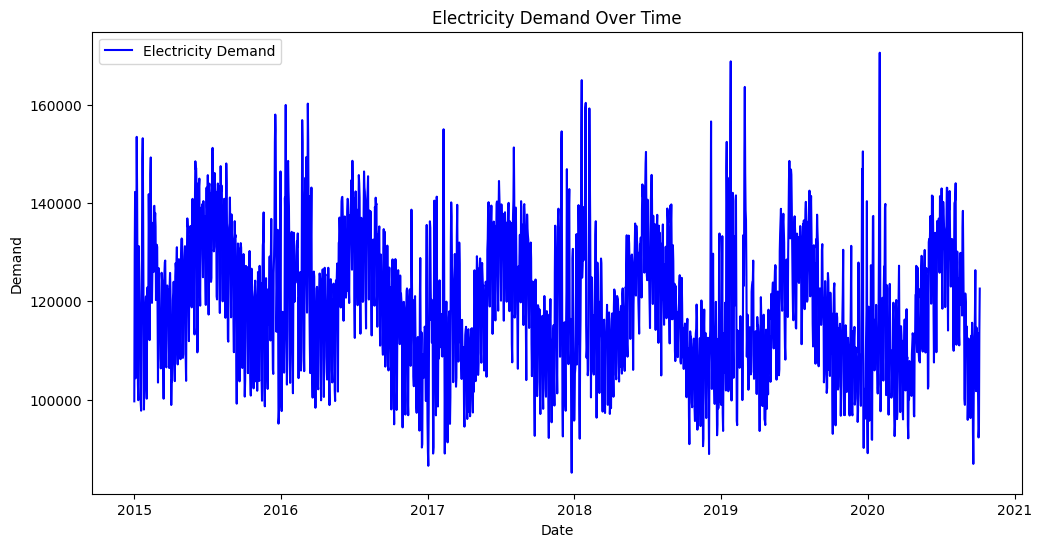

In [6]:
df['date']= pd.to_datetime(df['date'])
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['demand'], label="Electricity Demand", color='blue')
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Electricity Demand Over Time")
plt.legend()
plt.show()


In [7]:
df.date

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
2101   2020-10-02
2102   2020-10-03
2103   2020-10-04
2104   2020-10-05
2105   2020-10-06
Name: date, Length: 2106, dtype: datetime64[ns]

### Statistical Test

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
adf_test = adfuller(df['demand'])

# Extract results
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-Value: {adf_test[1]}")
if adf_test[1] > 0.05:
    print("Data is Non-Stationary")
else:
    print("Data is Stationary")


ADF Statistic: -3.9534474821262586
P-Value: 0.0016748806784635884
Data is Stationary


### Encoding variables

In [9]:
yn_columns = df.select_dtypes(include=['object']).columns

# Encode 'Y' to 1 and 'N' to 0
for col in yn_columns:
    if df[col].isin(['Y', 'N']).all():
        df[col + '_encoded'] = df[col].map({'Y': 1, 'N': 0})

print("Encoding completed successfully!")
print(df.head())


Encoding completed successfully!
        date      demand        RRP  demand_pos_RRP  RRP_positive  \
0 2015-01-01   99635.030  25.633696       97319.240     26.415953   
1 2015-01-02  129606.010  33.138988      121082.015     38.837661   
2 2015-01-03  142300.540  34.564855      142300.540     34.564855   
3 2015-01-04  104330.715  25.005560      104330.715     25.005560   
4 2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall school_day holiday  \
0             26.9            23.6       0.0          N       Y   
1  

In [10]:
df.drop(columns=yn_columns, inplace=True)

print("Original Y/N columns removed!")
print(df.head())


Original Y/N columns removed!
        date      demand        RRP  demand_pos_RRP  RRP_positive  \
0 2015-01-01   99635.030  25.633696       97319.240     26.415953   
1 2015-01-02  129606.010  33.138988      121082.015     38.837661   
2 2015-01-03  142300.540  34.564855      142300.540     34.564855   
3 2015-01-04  104330.715  25.005560      104330.715     25.005560   
4 2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall  school_day_encoded  \
0             26.9            23.6       0.0                   0   
1   

#### Cleaned Dataset from here

In [13]:
!pip install --upgrade scikit-learn

In [14]:
from sklearn.impute import SimpleImputer

# Creating an imputer object with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# List of columns to impute
columns_to_impute = ['solar_exposure', 'rainfall']

# Fit and transform the columns with missing values
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verify if missing values are handled
print(df.isnull().sum())


date                  0
demand                0
RRP                   0
demand_pos_RRP        0
RRP_positive          0
demand_neg_RRP        0
RRP_negative          0
frac_at_neg_RRP       0
min_temperature       0
max_temperature       0
solar_exposure        0
rainfall              0
school_day_encoded    0
holiday_encoded       0
dtype: int64


In [15]:
# Check for missing values
print("Missing values after imputation:")
print(df.isnull().sum())

# Check data types to confirm encoding
print("\nData types of each column:")
print(df.dtypes)

# Check unique values to verify encoding
#print("\nUnique values in encoded columns:")
#for col in df.columns:
    #print(f"{col}: {df[col].unique()}")


Missing values after imputation:
date                  0
demand                0
RRP                   0
demand_pos_RRP        0
RRP_positive          0
demand_neg_RRP        0
RRP_negative          0
frac_at_neg_RRP       0
min_temperature       0
max_temperature       0
solar_exposure        0
rainfall              0
school_day_encoded    0
holiday_encoded       0
dtype: int64

Data types of each column:
date                  datetime64[ns]
demand                       float64
RRP                          float64
demand_pos_RRP               float64
RRP_positive                 float64
demand_neg_RRP               float64
RRP_negative                 float64
frac_at_neg_RRP              float64
min_temperature              float64
max_temperature              float64
solar_exposure               float64
rainfall                     float64
school_day_encoded             int64
holiday_encoded                int64
dtype: object


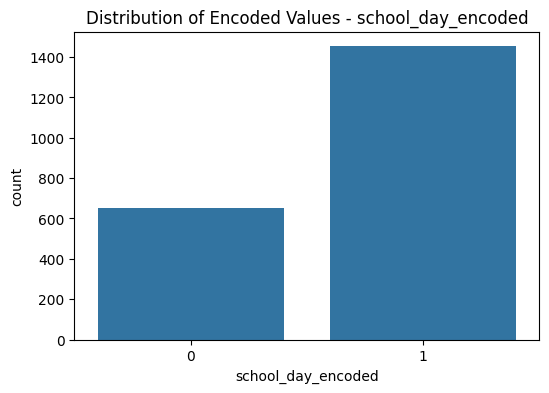

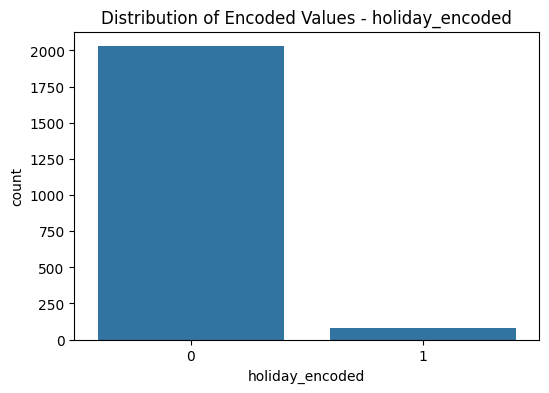

In [16]:
# Bar plot for encoded categorical variables
encoded_columns = ['school_day_encoded', 'holiday_encoded']  # Replace with your encoded column names
for col in encoded_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of Encoded Values - {col}")
    plt.show()



In [17]:

print("Count of 'school_day_encoded':")
print(df['school_day_encoded'].value_counts())

print("\nCount of 'holiday_encoded':")
print(df['holiday_encoded'].value_counts())


Count of 'school_day_encoded':
school_day_encoded
1    1453
0     653
Name: count, dtype: int64

Count of 'holiday_encoded':
holiday_encoded
0    2029
1      77
Name: count, dtype: int64


In [18]:
df.to_csv('cleaned_dataset.csv',index= False,date_format="%Y-%m-%d")
print("Cleaned and encoded dataset is saved")

Cleaned and encoded dataset is saved


# Forecasting with Prophet and Lightgbm

In [19]:
!pip install prophet lightgbm

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from prophet import Prophet
import lightgbm as lgb
import matplotlib.pyplot as plt


#### Loading the cleaned dataset as a copy to preserve the original 

In [23]:
df = pd.read_csv("cleaned_dataset.csv", parse_dates=['date'])
df_C = df.copy()
df_C.bfill(inplace=True)


We are **renaming** the columns to fit prophet's format

The columns:

date : ds

demand : y

In [24]:
df_C.rename(columns={'date': 'ds', 'demand': 'y'}, inplace=True)


In [25]:
train, test = train_test_split(df_C, test_size=0.2, shuffle=False)
train,test.value_counts()
#test.value_counts()

(             ds           y         RRP  demand_pos_RRP  RRP_positive  \
 0    2015-01-01   99635.030   25.633696       97319.240     26.415953   
 1    2015-01-02  129606.010   33.138988      121082.015     38.837661   
 2    2015-01-03  142300.540   34.564855      142300.540     34.564855   
 3    2015-01-04  104330.715   25.005560      104330.715     25.005560   
 4    2015-01-05  118132.200   26.724176      118132.200     26.724176   
 ...         ...         ...         ...             ...           ...   
 1679 2019-08-07  136315.380  129.262529      136315.380    129.262529   
 1680 2019-08-08  133004.730   95.454195      133004.730     95.454195   
 1681 2019-08-09  142555.105  119.957481      142555.105    119.957481   
 1682 2019-08-10  128554.605   94.668809      128554.605     94.668809   
 1683 2019-08-11  121028.325   98.101094      121028.325     98.101094   
 
       demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
 0           2315.790     -7.240000  

**Evaluation Metrics** function 

In [26]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2%}")
    return mae, rmse, mape


#### **Baseline Model** without external regressors 

In [27]:
prophet_baseline = Prophet()
prophet_baseline.fit(train[['ds', 'y']])

# Forecast using Prophet (Baseline)
future_baseline = prophet_baseline.make_future_dataframe(periods=len(test))
forecast_baseline = prophet_baseline.predict(future_baseline)

print("Prophet Baseline Model Evaluation:")

evaluate_model(test['y'], forecast_baseline['yhat'][-len(test):])

16:54:07 - cmdstanpy - INFO - Chain [1] start processing
16:54:08 - cmdstanpy - INFO - Chain [1] done processing


Prophet Baseline Model Evaluation:
MAE: 6698.78, RMSE: 8807.14, MAPE: 5.82%


(6698.77571983007, np.float64(8807.143873823936), 0.05819724056518794)

**Performance Metrics:**

MAE (Mean Absolute Error): 6698.78

RMSE (Root Mean Squared Error): 8807.14

MAPE (Mean Absolute Percentage Error)  : 5.82%

#### **Enhanced Prophet Model** with external regressors

In [28]:
regressors = [
    'min_temperature', 'max_temperature', 'solar_exposure',
    'RRP', 'school_day_encoded','holiday_encoded' ,'RRP_positive', 'RRP_negative'
]
df_C = df_C[["ds", "y"] + regressors]

# Check the data structure
df_C.head()

,ds,y,min_temperature,max_temperature,solar_exposure,RRP,school_day_encoded,holiday_encoded,RRP_positive,RRP_negative
0,2015-01-01,99635.030,13.3,26.9,23.6,25.633696,0,1,26.415953,-7.240000
1,2015-01-02,129606.010,15.4,38.8,26.8,33.138988,0,0,38.837661,-47.809777
2,2015-01-03,142300.540,20.0,38.2,26.5,34.564855,0,0,34.564855,0.000000
3,2015-01-04,104330.715,16.3,21.4,25.2,25.005560,0,0,25.005560,0.000000
4,2015-01-05,118132.200,15.0,22.0,30.7,26.724176,0,0,26.724176,0.000000


In [30]:
prophet_enhanced = Prophet()
for reg in regressors:
    prophet_enhanced.add_regressor(reg)

prophet_enhanced.fit(df_C)

#prophet_enhanced.fit(["ds","y"]+ regressors)
# Forecast using Prophet (Enhanced)
future_enhanced = prophet_enhanced.make_future_dataframe(periods=len(test))
for reg in regressors:
    if reg in df_C.columns:  # Use historical avg if available
        future_enhanced[reg] = df_C[reg].mean()  
    else:
        future_enhanced[reg] = 0 
forecast_enhanced = prophet_enhanced.predict(future_enhanced)


print("Prophet Enhanced Model Evaluation:")
evaluate_model(test['y'], forecast_enhanced['yhat'][-len(test):])

16:54:52 - cmdstanpy - INFO - Chain [1] start processing
16:54:52 - cmdstanpy - INFO - Chain [1] done processing


Prophet Enhanced Model Evaluation:
MAE: 13919.26, RMSE: 17293.52, MAPE: 11.98%


(13919.258523749111, np.float64(17293.516525685976), 0.11980577746883724)

**Performance Metrics:** on entire dataset 

MAE (Mean Absolute Error): 13919.26

RMSE (Root Mean Squared Error): 17293.52

MAPE (Mean Absolute Percentage Error): 11.98%


**Performance Metrics:** on smaller test set

MAE (Mean Absolute Error): 6397.73

RMSE (Root Mean Squared Error): 7835.68

1MAPE (Mean Absolute Percentage Error): 5.58%

##### Visualizing the comparison between baseline model and enhanced model

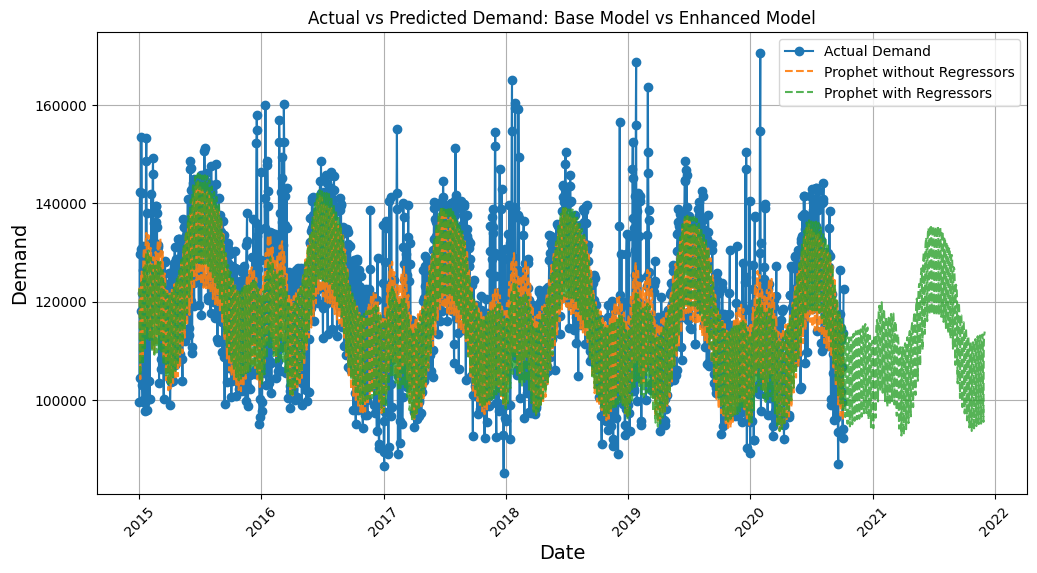

In [31]:
# Plotting Actual vs Predicted (Base and Enhanced Model)
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_C['ds'], df_C['y'], label='Actual Demand', marker = "o", linestyle="-")

# Plot predictions from the base model (without regressors)
plt.plot(forecast_baseline['ds'], forecast_baseline["yhat"], label='Prophet without Regressors', linestyle='--', alpha=0.9)

# Plot predictions from the enhanced model (with regressors)
plt.plot(forecast_enhanced['ds'], forecast_enhanced['yhat'], label='Prophet with Regressors', linestyle='--', alpha=0.8)

plt.title('Actual vs Predicted Demand: Base Model vs Enhanced Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### **Using LightGBM with Prophet for Prediction**  

**Concept:**  
1. **Prophet** is great for capturing **seasonality, trends, and holidays** in time-series data.  
2. **LightGBM** is a powerful gradient boosting model that excels at handling **complex interactions** and **non-linear relationships** in data.  

**Steps:**  
- First, **Prophet** predicts based on time-based patterns.  
- Then, **LightGBM** takes Prophet’s predictions as **inputs** along with other external factors (e.g., temperature, holidays, etc.) to refine and improve accuracy.  

**Benefits:**  
**Better Accuracy** – LightGBM corrects Prophet’s errors using additional data.  
**Handles Complex Features** – Works well with multiple external regressors.  
**Fast & Scalable** – LightGBM is efficient for large datasets.  
**Combines Strengths** – Prophet handles time trends; LightGBM fine-tunes predictions.  

This hybrid approach helps improve forecasting precision, making predictions **more reliable**! 

#### **LightGBM** 

In [40]:
from lightgbm import LGBMRegressor

X = forecast_enhanced[['yhat']]
y = df_C['y']
X, y = X.align(y, join='inner', axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.05)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print("LightGBM Model Evaluation (using Prophet predictions):")
evaluate_model(y_test, y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1684, number of used features: 1
[LightGBM] [Info] Start training from score 121051.269592
LightGBM Model Evaluation (using Prophet predictions):
MAE: 6645.78, RMSE: 9053.98, MAPE: 5.72%


(6645.780906911618, np.float64(9053.980039042423), 0.05721289720595718)

**Performance Metrics:**

For optimizing lightgbm using prophet predictions

MAE (Mean Absolute Error): 6645.78

RMSE (Root Mean Squared Error): 9053.98

MAPE (Mean Absolute Percentage Error):5.72%

Visualizing prophet preditions and LightGBM optimized predictions

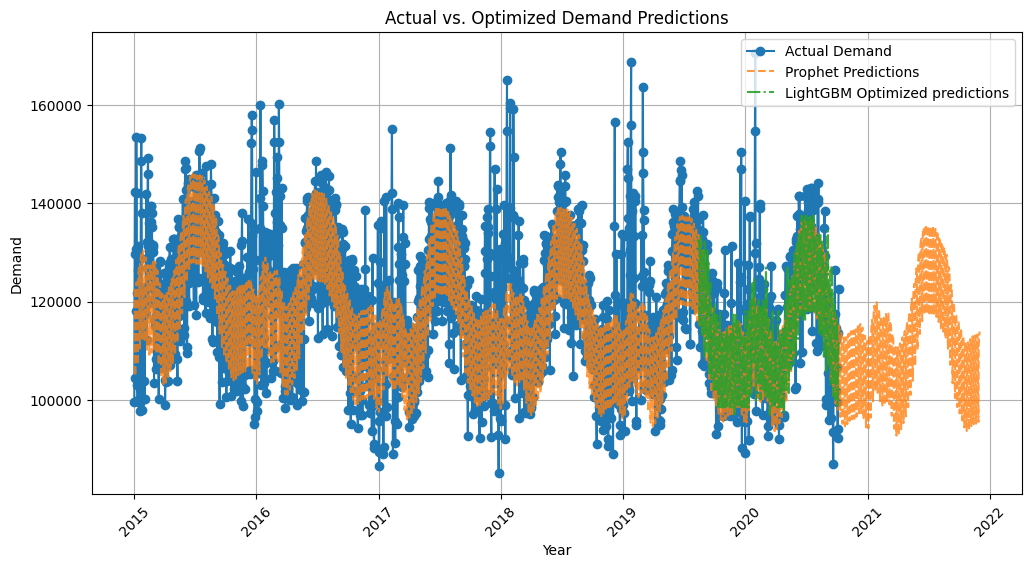

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df_C["ds"], df_C["y"], label="Actual Demand", marker="o", linestyle="-")
plt.plot(forecast_enhanced["ds"], forecast_enhanced["yhat"], label="Prophet Predictions", linestyle="--", alpha=0.8)
plt.plot(df_C["ds"].iloc[-len(y_test):], y_pred, label="LightGBM Optimized predictions", linestyle="-.", alpha=0.9)
plt.xlabel("Year")
plt.ylabel("Demand")
plt.title("Actual vs. Optimized Demand Predictions")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [62]:
#print(X.shape, y.shape)


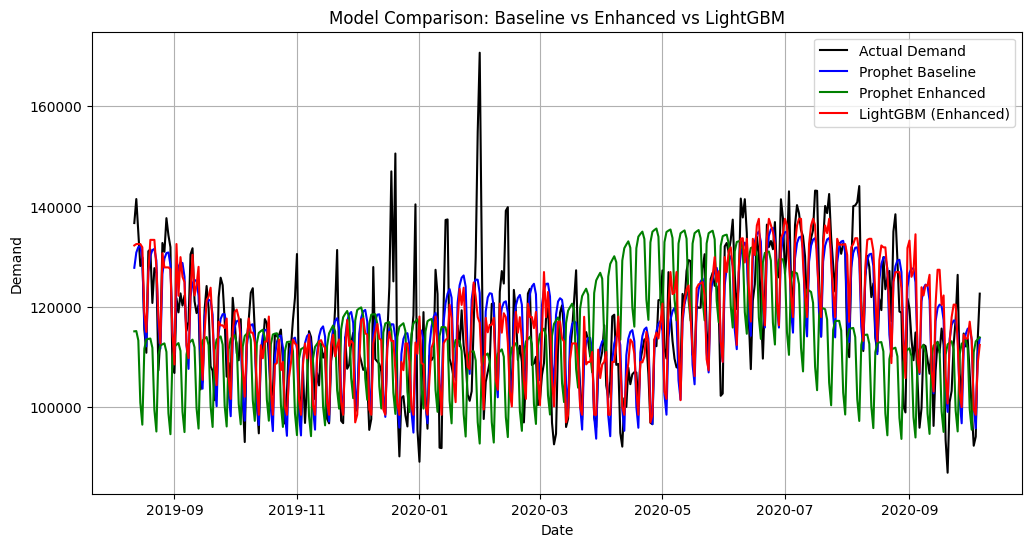

In [44]:
# Visualization of Results
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual Demand', color='black',linestyle="-")
plt.plot(test['ds'], forecast_baseline['yhat'][-len(test):], label='Prophet Baseline', color='blue',linestyle="-")
plt.plot(test['ds'], forecast_enhanced['yhat'][-len(test):], label='Prophet Enhanced', color='green',linestyle="-")
plt.plot(test['ds'], y_pred, label='LightGBM (Enhanced)', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Model Comparison: Baseline vs Enhanced vs LightGBM')
plt.legend()
plt.grid()
plt.show()

#### Forecast for **1** year

In [45]:
#prophet_enhanced.fit(df_C)  # Ensure `full_data` includes all years up to 2021


In [46]:
future_1yr = prophet_enhanced.make_future_dataframe(periods=365, freq='D')  # 1-year forecast


In [47]:
for reg in regressors:
    future_1yr[reg] = df[reg].mean()

In [48]:
forecast_1yr = prophet_enhanced.predict(future_1yr)

In [49]:
print(prophet_enhanced.history['ds'].max())


2020-10-06 00:00:00


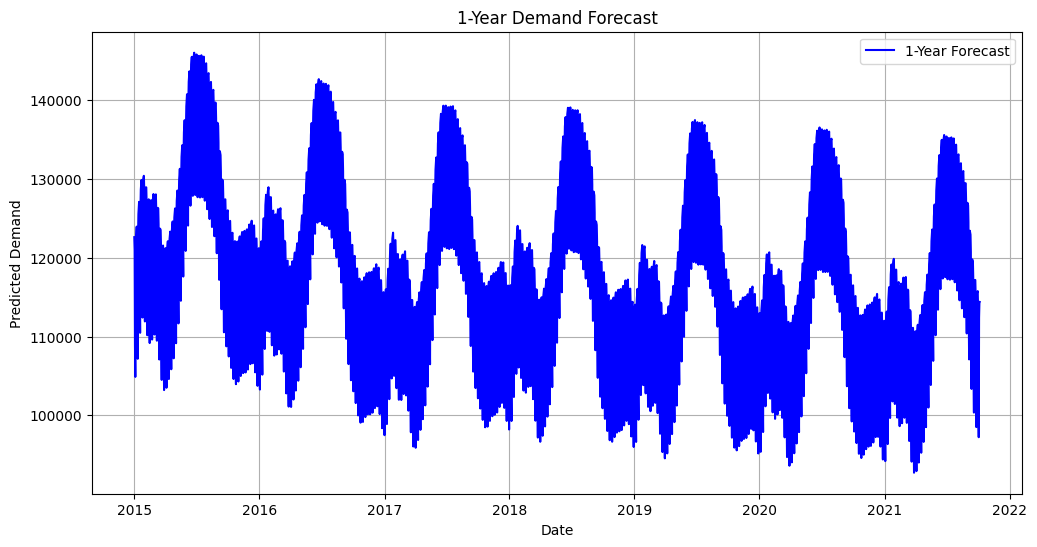

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_1yr['ds'], forecast_1yr['yhat'], label="1-Year Forecast", color='blue')
plt.xlabel("Date")
plt.ylabel("Predicted Demand")
plt.title("1-Year Demand Forecast")
plt.legend()
plt.grid(True)
plt.show()

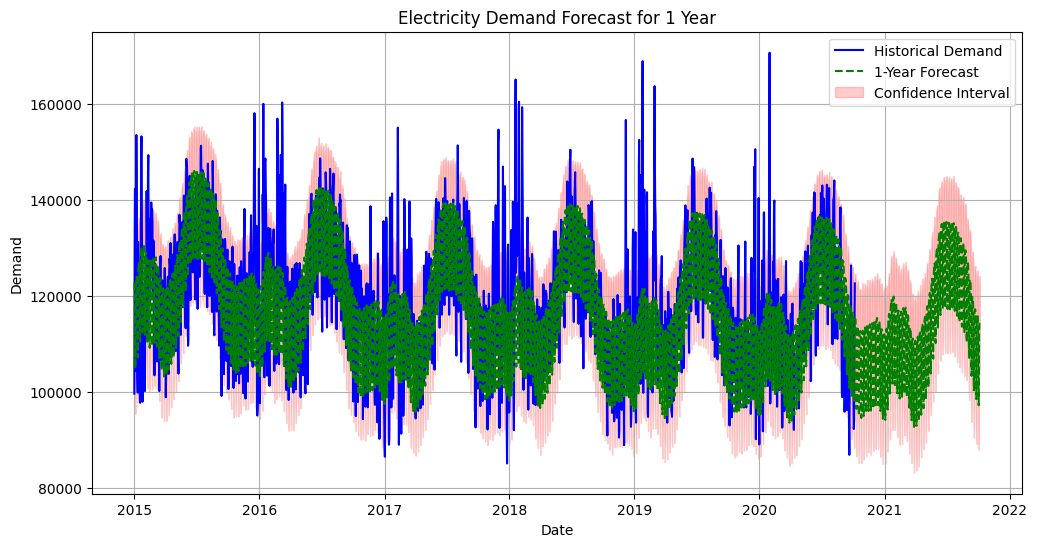

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_C['ds'], df_C['y'], label='Historical Demand', color='blue')

ax.plot(forecast_1yr['ds'], forecast_1yr['yhat'], label='1-Year Forecast', color='green', linestyle='dashed')

ax.fill_between(forecast_1yr['ds'], forecast_1yr['yhat_lower'], forecast_1yr['yhat_upper'], 
                color='red', alpha=0.2, label='Confidence Interval')

ax.set_title("Electricity Demand Forecast for 1 Year")
ax.set_xlabel("Date")
ax.set_ylabel("Demand")
ax.legend()

plt.grid()
plt.show()


In [52]:
print(future_1yr.tail())  # Check if dates extend till 2022


             ds  min_temperature  max_temperature  solar_exposure        RRP  \
2466 2021-10-02        11.582289          20.4132       14.743373  76.079554   
2467 2021-10-03        11.582289          20.4132       14.743373  76.079554   
2468 2021-10-04        11.582289          20.4132       14.743373  76.079554   
2469 2021-10-05        11.582289          20.4132       14.743373  76.079554   
2470 2021-10-06        11.582289          20.4132       14.743373  76.079554   

      school_day_encoded  holiday_encoded  RRP_positive  RRP_negative  
2466            0.689934         0.036562     76.553847     -2.686052  
2467            0.689934         0.036562     76.553847     -2.686052  
2468            0.689934         0.036562     76.553847     -2.686052  
2469            0.689934         0.036562     76.553847     -2.686052  
2470            0.689934         0.036562     76.553847     -2.686052  


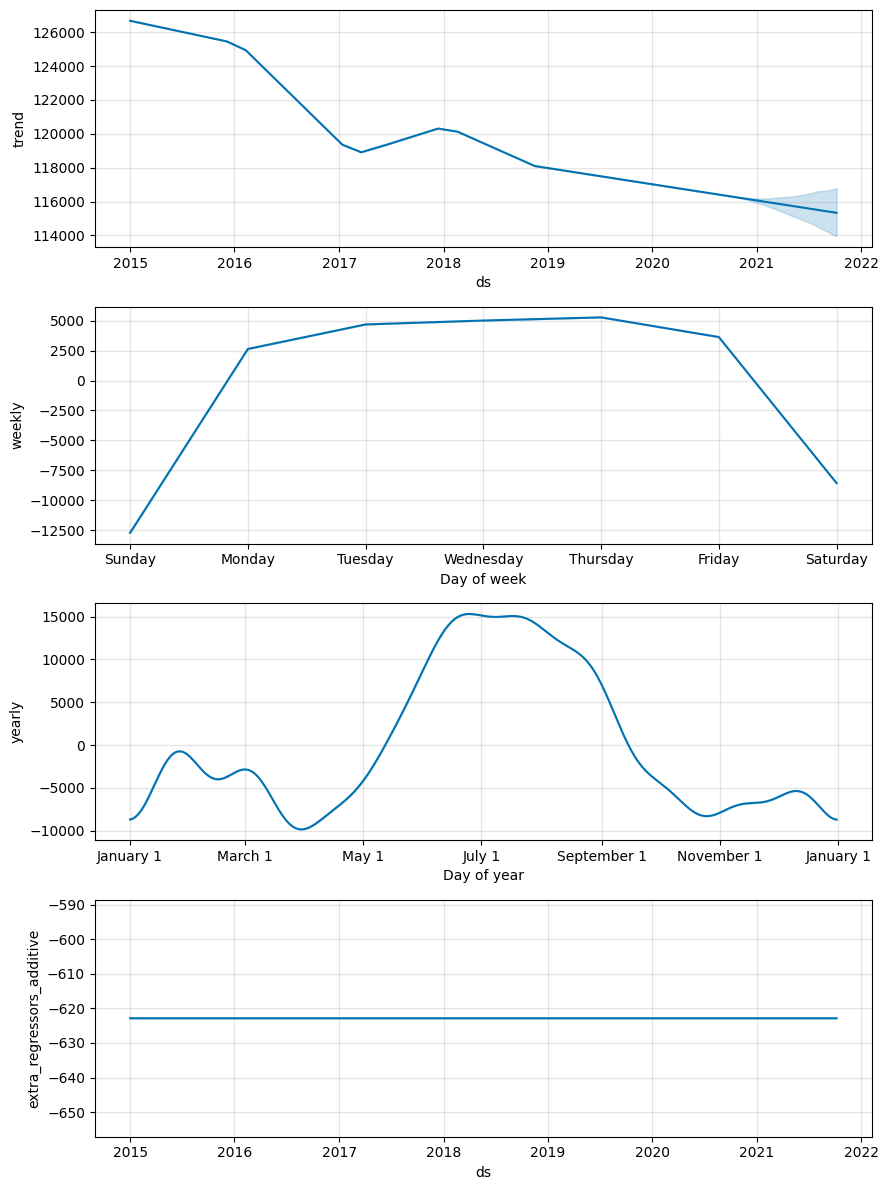

In [53]:
fig2 = prophet_enhanced.plot_components(forecast_1yr)
plt.show()

#### Forecast for **2** years

In [54]:
future_2yr = prophet_enhanced.make_future_dataframe(periods=730)  # 2-year forecast


In [55]:
for reg in regressors:
    future_2yr[reg] = df[reg].mean()

In [56]:
forecast_2yr = prophet_enhanced.predict(future_2yr)


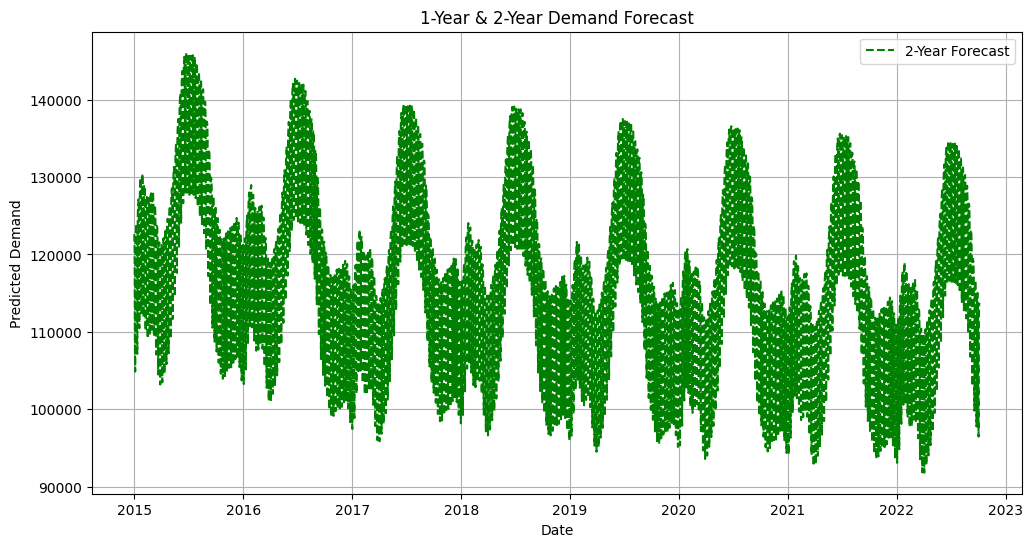

In [57]:
plt.figure(figsize=(12, 6))
#plt.plot(forecast_1yr['ds'], forecast_1yr['yhat'], label="1-Year Forecast", color='blue')
plt.plot(forecast_2yr['ds'], forecast_2yr['yhat'], label="2-Year Forecast", color='green', linestyle="--")

plt.xlabel("Date")
plt.ylabel("Predicted Demand")
plt.title("1-Year & 2-Year Demand Forecast")
plt.legend()
plt.grid(True)
plt.show()

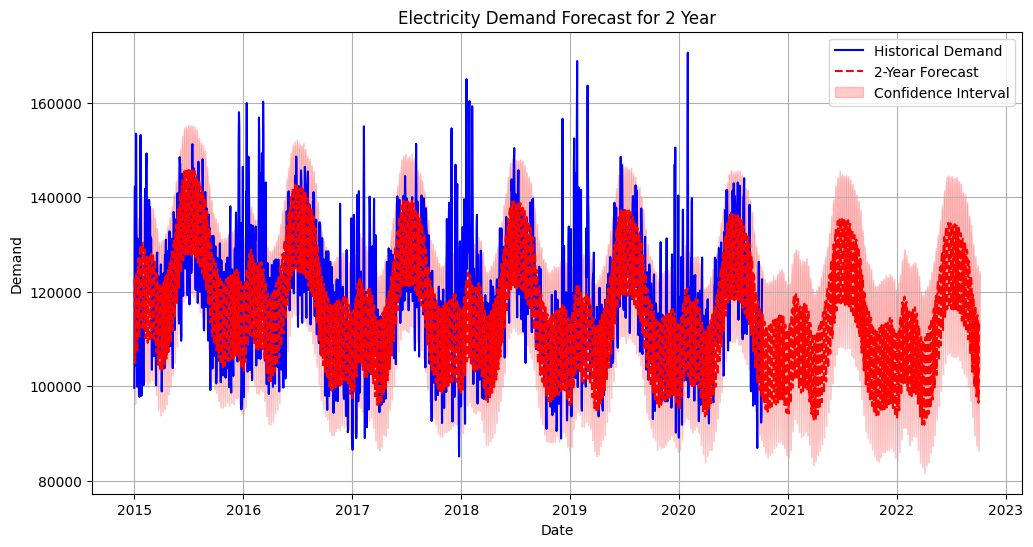

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_C['ds'], df_C['y'], label='Historical Demand', color='blue')

ax.plot(forecast_2yr['ds'], forecast_2yr['yhat'], label='2-Year Forecast', color='red', linestyle='dashed')

ax.fill_between(forecast_2yr['ds'], forecast_2yr['yhat_lower'], forecast_2yr['yhat_upper'], 
                color='red', alpha=0.2, label='Confidence Interval')

ax.set_title("Electricity Demand Forecast for 2 Year")
ax.set_xlabel("Date")
ax.set_ylabel("Demand")
ax.legend()
plt.grid()
plt.show()


In [59]:
#fig2 = prophet_enhanced.plot_components(forecast_2yr)
#plt.show()

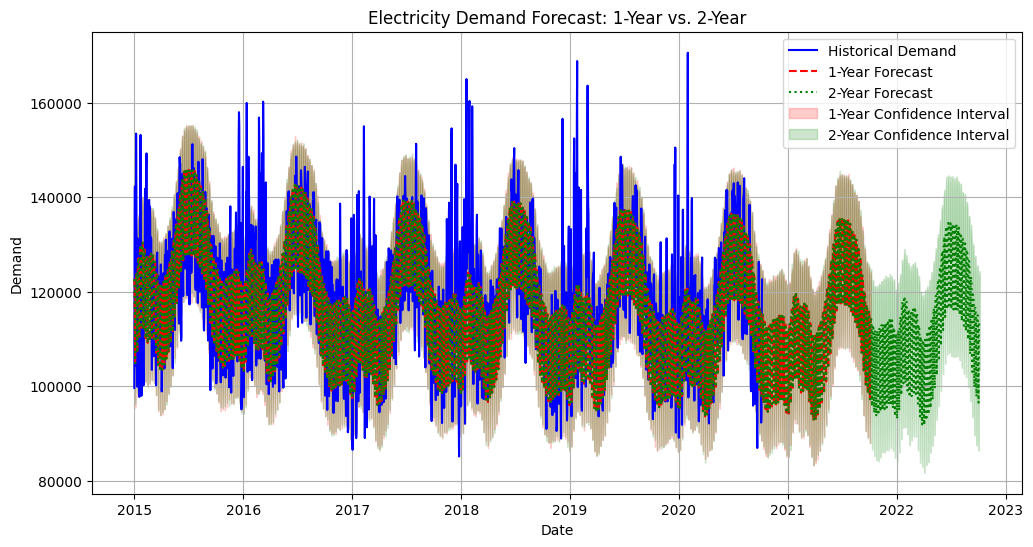

In [60]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Historical Demand
ax.plot(df_C['ds'], df_C['y'], label='Historical Demand', color='blue')

# Plot 1-Year Forecast
ax.plot(forecast_1yr['ds'], forecast_1yr['yhat'], label='1-Year Forecast', color='red', linestyle='dashed')

# Plot 2-Year Forecast
ax.plot(forecast_2yr['ds'], forecast_2yr['yhat'], label='2-Year Forecast', color='green', linestyle='dotted')

ax.fill_between(forecast_1yr['ds'], forecast_1yr['yhat_lower'], forecast_1yr['yhat_upper'], 
                color='red', alpha=0.2, label='1-Year Confidence Interval')

ax.fill_between(forecast_2yr['ds'], forecast_2yr['yhat_lower'], forecast_2yr['yhat_upper'], 
                color='green', alpha=0.2, label='2-Year Confidence Interval')

ax.set_title("Electricity Demand Forecast: 1-Year vs. 2-Year")
ax.set_xlabel("Date")
ax.set_ylabel("Demand")
ax.legend()

plt.grid()
plt.show()


#### Comparing **lightGBM** predictions along with 1-year and 2-year predictions

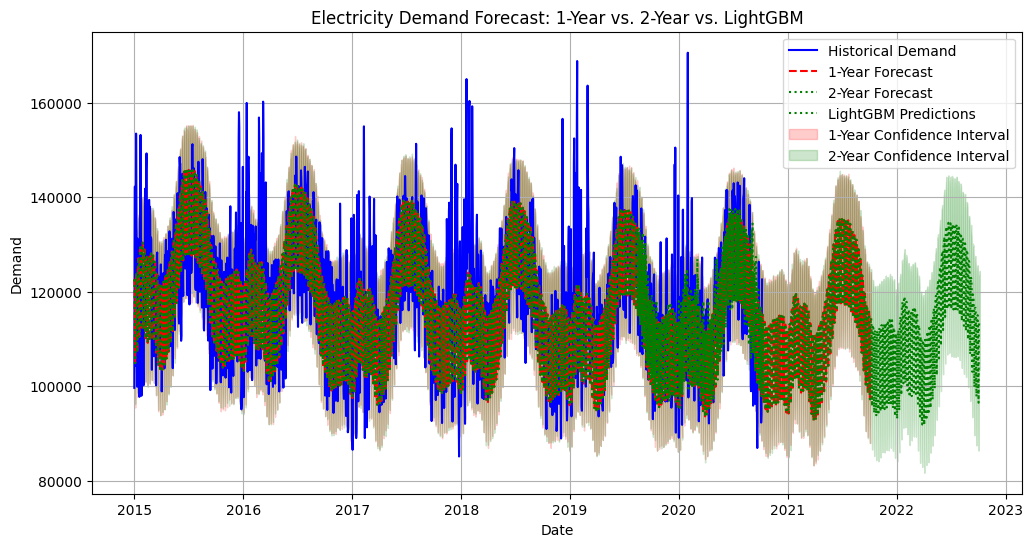

In [66]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Historical Demand
ax.plot(df_C['ds'], df_C['y'], label='Historical Demand', color='blue')

ax.plot(forecast_1yr['ds'], forecast_1yr['yhat'], label='1-Year Forecast', color='red', linestyle='dashed')

ax.plot(forecast_2yr['ds'], forecast_2yr['yhat'], label='2-Year Forecast', color='green', linestyle='dotted')

ax.plot(test['ds'], y_pred, label='LightGBM Predictions', color='green', linestyle='dotted')

ax.fill_between(forecast_1yr['ds'], forecast_1yr['yhat_lower'], forecast_1yr['yhat_upper'], 
                color='red', alpha=0.2, label='1-Year Confidence Interval')

ax.fill_between(forecast_2yr['ds'], forecast_2yr['yhat_lower'], forecast_2yr['yhat_upper'], 
                color='green', alpha=0.2, label='2-Year Confidence Interval')

ax.set_title("Electricity Demand Forecast: 1-Year vs. 2-Year vs. LightGBM")
ax.set_xlabel("Date")
ax.set_ylabel("Demand")
ax.legend()

plt.grid()
plt.show()


Prediction for **3 years**:

In [74]:
future_3yr = prophet_enhanced.make_future_dataframe(periods=1095, freq='D')  


In [69]:
for reg in regressors:
    future_3yr[reg] = df[reg].mean()

In [70]:
forecast_3yr = prophet_enhanced.predict(future_3yr)


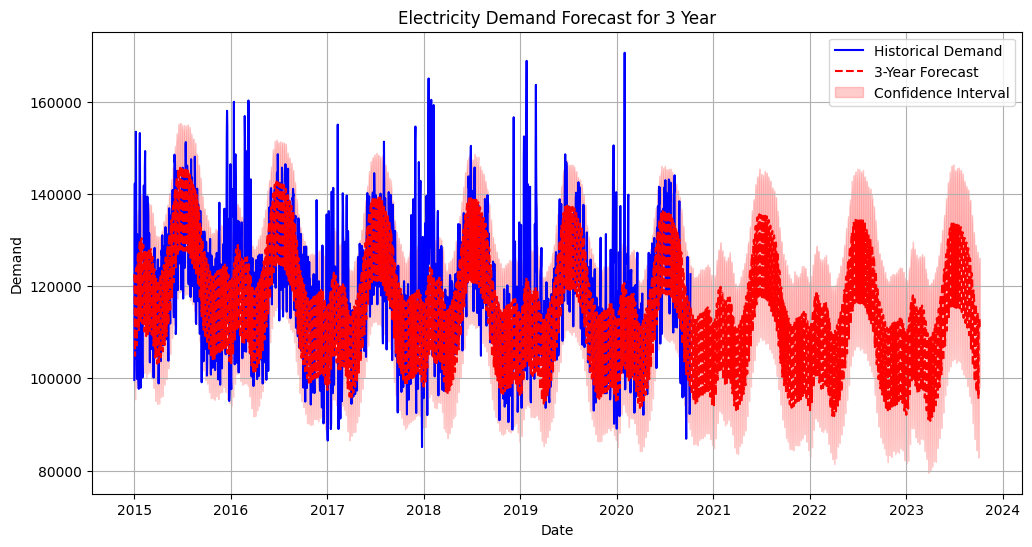

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_C['ds'], df_C['y'], label='Historical Demand', color='blue')

ax.plot(forecast_3yr['ds'], forecast_3yr['yhat'], label='3-Year Forecast', color='red', linestyle='dashed')

ax.fill_between(forecast_3yr['ds'], forecast_3yr['yhat_lower'], forecast_3yr['yhat_upper'], 
                color='red', alpha=0.2, label='Confidence Interval')

ax.set_title("Electricity Demand Forecast for 3 Year")
ax.set_xlabel("Date")
ax.set_ylabel("Demand")
ax.legend()
plt.grid()
plt.show()

In [76]:
#fig3 = prophet_enhanced.plot_components(forecast_3yr)
#plt.show()